In [16]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
#loading dataset as 2 dataframes from one excel file
xls = pd.ExcelFile('Carbon_Emission_Dataset.xls')
df1 = pd.read_excel(xls, 'Data')
df2 = pd.read_excel(xls, 'Metadata - Countries')

In [18]:
df1.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.222538,0.207535,0.115282,0.095689,0.083465,0.075523,...,0.265210,0.189910,0.149162,0.176278,0.153019,0.134106,0.165455,0.160976,NaN,NaN
1,Africa Eastern and Southern,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.982136,0.937815,0.902599,0.904581,0.906340,0.926339,...,0.983547,0.995665,1.006938,0.956704,0.938565,0.928508,NaN,0.903764,NaN,NaN
2,Africa Western and Central,AFW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.473669,0.525418,0.563118,0.518770,0.466821,0.497312,...,0.472242,0.499219,0.506918,0.485478,0.490807,0.474882,0.478305,0.485884,NaN,NaN
3,Albania,ALB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1.819542,1.242810,0.683700,0.638307,0.645355,0.605436,...,1.503240,1.533630,1.668337,1.603775,1.557664,1.788786,1.782739,1.692248,NaN,NaN
4,Algeria,DZA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2.466487,2.541909,2.498850,2.640167,2.634856,2.684175,...,3.621255,3.658361,3.811645,3.951885,3.840173,3.849132,3.948290,4.010035,NaN,NaN


In [19]:
df2.head(5)

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola


In [20]:
df1 = df1.drop('1996.1', axis = 1)

### Handling missing values

In [21]:
#rows and columns in df1
print("Rows: ", df1.shape[0])
print("Columns: ", df1.shape[1])

Rows:  268
Columns:  36


In [22]:
#checking for missing values in df1
df1.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1990               33
1991               32
1992               28
1993               28
1994               26
1995               27
1996               27
1997               28
1998               29
1999               29
2000               28
2001               28
2002               27
2003               27
2004               27
2005               27
2006               27
2007               27
2008               27
2009               27
2010               27
2011               27
2012               27
2013               27
2014               28
2015               27
2016               30
2017               30
2018               32
2019               27
2020              268
2021              268
dtype: int64

In [23]:
df1.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

**Handling missing values in df1**

In [24]:
#dropping 2020 and 2021 because entire column is empty
df1 = df1.drop(['2020', '2021'], axis = 1)

#for rest of columns with missing values
from sklearn.impute import KNNImputer

# Create an instance of the KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Define the columns with missing values
columns_with_missing = ['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
                        '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
                        '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
                        '2017', '2018', '2019']

# Fill missing values using the KNN imputer
df1[columns_with_missing] = imputer.fit_transform(df1[columns_with_missing])

# Print the modified dataframe
df1.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1990              0
1991              0
1992              0
1993              0
1994              0
1995              0
1996              0
1997              0
1998              0
1999              0
2000              0
2001              0
2002              0
2003              0
2004              0
2005              0
2006              0
2007              0
2008              0
2009              0
2010              0
2011              0
2012              0
2013              0
2014              0
2015              0
2016              0
2017              0
2018              0
2019              0
dtype: int64

In [10]:
#rows and columns in df2
print("Rows: ", df2.shape[0])
print("Columns: ", df2.shape[1])

Rows:  265
Columns:  5


In [12]:
#checking for missing values in df2
df2.isnull().sum()

Country Code      0
Region           48
IncomeGroup      49
SpecialNotes    139
TableName         0
dtype: int64

In [25]:
df2.columns

Index(['Country Code', 'Region', 'IncomeGroup', 'SpecialNotes', 'TableName'], dtype='object')

**Handling missing values in df2**

In [47]:
# Define the columns with missing categorical values
columns_with_missing = ['Region', 'IncomeGroup']

# Fill missing values with the mode (most frequent value)
df2[columns_with_missing] = df2[columns_with_missing].fillna(df2[columns_with_missing].mode().iloc[0])


# Print the modified dataset
df2[columns_with_missing].isnull().sum()

Region         0
IncomeGroup    0
dtype: int64

*Missing values were handled*

### Creating a consolidated dataset of CO2 emissions grouped by region and income.

In [49]:
# Select the relevant columns from DataFrame 1
co2_df = df1[['Country Name', 'Country Code', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
              '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
              '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
              '2016', '2017', '2018', '2019']]

# Merge the CO2 emissions DataFrame with the region and income DataFrame based on 'Country Code'
consolidated_df = pd.merge(co2_df, df2[['Country Code', 'Region', 'IncomeGroup']], on='Country Code')

# Group the consolidated dataset by region, income, and country name, and calculate the sum of CO2 emissions
grouped_df = consolidated_df.groupby(['Country Name', 'Region', 'IncomeGroup']).sum().reset_index()

# Print the consolidated dataset
grouped_df

,Country Name,Region,IncomeGroup,1990,1991,1992,1993,1994,1995,1996,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,South Asia,Low income,0.222538,0.207535,0.115282,0.095689,0.083465,0.075523,0.068979,...,0.252220,0.305308,0.265210,0.189910,0.149162,0.176278,0.153019,0.134106,0.165455,0.160976
1,Africa Eastern and Southern,Europe & Central Asia,High income,0.982136,0.937815,0.902599,0.904581,0.906340,0.926339,0.936869,...,1.011807,0.970188,0.983547,0.995665,1.006938,0.956704,0.938565,0.928508,0.913918,0.903764
2,Africa Western and Central,Europe & Central Asia,High income,0.473669,0.525418,0.563118,0.518770,0.466821,0.497312,0.559529,...,0.464419,0.468718,0.472242,0.499219,0.506918,0.485478,0.490807,0.474882,0.478305,0.485884
3,Albania,Europe & Central Asia,Upper middle income,1.819542,1.242810,0.683700,0.638307,0.645355,0.605436,0.612367,...,1.527624,1.669423,1.503240,1.533630,1.668337,1.603775,1.557664,1.788786,1.782739,1.692248
4,Algeria,Middle East & North Africa,Lower middle income,2.466487,2.541909,2.498850,2.640167,2.634856,2.684175,2.626219,...,3.184374,3.305372,3.621255,3.658361,3.811645,3.951885,3.840173,3.849132,3.948290,4.010035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,West Bank and Gaza,Middle East & North Africa,Lower middle income,4.348182,4.238486,4.160620,4.088522,325.909480,317.451750,324.058118,...,4.381193,4.401961,4.445046,4.347589,4.268463,4.198561,4.190761,4.203249,4.212328,4.150593
263,World,Europe & Central Asia,High income,3.896327,3.858114,3.801811,3.767891,3.731384,3.780965,3.804548,...,4.454106,4.539726,4.545693,4.581344,4.536890,4.455899,4.407214,4.422518,4.475379,4.435673
264,"Yemen, Rep.",Middle East & North Africa,Low income,0.496444,0.611693,0.632544,0.570455,0.600521,0.653902,0.650041,...,1.027726,0.900862,0.801193,1.031352,0.988351,0.475163,0.370636,0.333285,0.315682,0.351859
265,Zambia,Sub-Saharan Africa,Low income,0.356474,0.365461,0.352970,0.303473,0.252531,0.245275,0.197708,...,0.192864,0.213798,0.273319,0.278307,0.298009,0.305264,0.317276,0.393686,0.433396,0.369958


### Check missing values

In [50]:
#checking for missing values
grouped_df.isnull().sum()

Country Name    0
Region          0
IncomeGroup     0
1990            0
1991            0
1992            0
1993            0
1994            0
1995            0
1996            0
1997            0
1998            0
1999            0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
2019            0
dtype: int64

***No missing values observed***

### Identify erroneous values/outliers in the dataset

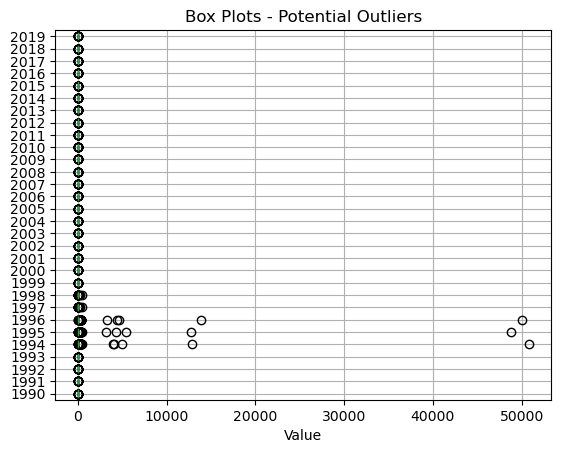

In [51]:
#visualizing Outliers
numerical_columns = list(grouped_df.select_dtypes(include=[np.number]).columns)

# Create box plots to visualize potential outliers
grouped_df[numerical_columns].boxplot(sym='o', vert=False)
plt.title('Box Plots - Potential Outliers')
plt.xlabel('Value')
plt.show()

### Treat outliers in the dataset

In [52]:
#capping the outliers to upper and lower bounds

# Select the numerical columns to treat outliers
numerical_columns = list(grouped_df.select_dtypes(include=[np.number]).columns)

# Define the IQR threshold for identifying outliers
iqr_threshold = 1.5  # Adjust as needed

# Treat outliers using the IQR method
for column in numerical_columns:
    Q1 = grouped_df[column].quantile(0.25)
    Q3 = grouped_df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds for outliers
    lower_bound = Q1 - iqr_threshold * IQR
    upper_bound = Q3 + iqr_threshold * IQR

    # Cap the outliers
    grouped_df[column] = grouped_df[column].clip(lower=lower_bound, upper=upper_bound)

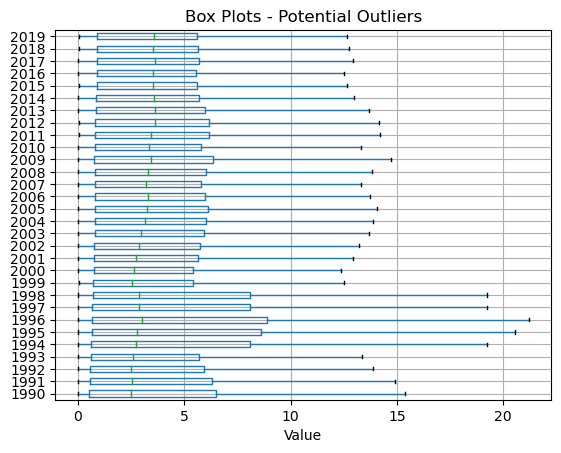

In [53]:
numerical_columns = list(grouped_df.select_dtypes(include=[np.number]).columns)

# Create box plots to visualize potential outliers
grouped_df[numerical_columns].boxplot(sym='o', vert=False)
plt.title('Box Plots - Potential Outliers')
plt.xlabel('Value')
plt.show()

### Identify countries with highest CO2 emissions in last 5 years

In [55]:
# Sort the dataset based on the last five years' columns in descending order
sorted_df = grouped_df.sort_values(['2015', '2016', '2017', '2018', '2019'], ascending=False)

# Select the top countries with highest CO2 emissions in the last five years (e.g., top 10 countries)
top_countries = sorted_df.head(5)

# Print the top countries
top_countries

,Country Name,Region,IncomeGroup,1990,1991,1992,1993,1994,1995,1996,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
12,Aruba,Latin America & Caribbean,High income,15.371677,14.919221,13.895762,13.36809,19.241156,20.542677,21.193246,...,13.306465,14.225892,14.150205,13.687132,12.987464,12.667785,12.502211,12.915502,12.743015,12.646428
13,Australia,East Asia & Pacific,High income,15.371677,14.919221,13.895762,13.36809,15.735616,16.116740,16.505561,...,13.306465,14.225892,14.150205,13.687132,12.987464,12.667785,12.502211,12.915502,12.743015,12.646428
17,Bahrain,Middle East & North Africa,High income,15.371677,14.919221,13.895762,13.36809,19.241156,20.542677,21.193246,...,13.306465,14.225892,14.150205,13.687132,12.987464,12.667785,12.502211,12.915502,12.743015,12.646428
31,Brunei Darussalam,East Asia & Pacific,High income,12.446168,12.525013,12.940854,13.36809,19.241156,20.542677,21.193246,...,13.306465,14.225892,14.150205,13.687132,12.987464,12.667785,12.502211,12.915502,12.743015,12.646428
38,Canada,North America,High income,15.148890,14.741014,13.895762,13.36809,15.060345,15.290603,15.592590,...,13.306465,14.225892,14.150205,13.687132,12.987464,12.667785,12.502211,12.915502,12.743015,12.646428


### Identify the top 5 countries in each region with the highest emission in the past 3 years

In [56]:
# Sort the dataset within each region group based on emissions in the last three years
sorted_df = grouped_df.groupby('Region').apply(lambda x: x.nlargest(5, ['2017', '2018', '2019'])).reset_index(drop=True)

# Print the top 5 countries in each region with the highest emissions in the past 3 years
sorted_df

,Country Name,Region,IncomeGroup,1990,1991,1992,1993,1994,1995,1996,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Australia,East Asia & Pacific,High income,15.371677,14.919221,13.895762,13.368090,15.735616,16.116740,16.505561,...,13.306465,14.225892,14.150205,13.687132,12.987464,12.667785,12.502211,12.915502,12.743015,12.646428
1,Brunei Darussalam,East Asia & Pacific,High income,12.446168,12.525013,12.940854,13.368090,19.241156,20.542677,21.193246,...,13.306465,14.225892,14.150205,13.687132,12.987464,12.667785,12.502211,12.915502,12.743015,12.646428
2,Palau,East Asia & Pacific,Upper middle income,13.405207,13.225499,12.496876,12.210012,11.926058,11.621826,11.279044,...,11.326860,11.513158,12.258999,12.356080,12.362329,11.801731,12.502211,12.915502,12.743015,12.646428
3,"Korea, Rep.",East Asia & Pacific,High income,5.777563,6.346819,6.790031,7.412666,7.936106,8.547005,9.005884,...,11.607916,11.984787,11.958601,11.890009,11.588744,11.914744,12.024725,12.200286,12.225246,11.799325
4,Japan,East Asia & Pacific,High income,8.831776,8.905650,8.961704,8.873018,9.273035,9.332839,9.420311,...,9.030062,9.493011,9.822297,9.908431,9.562840,9.276629,9.189698,9.098305,8.801681,8.540980
5,Luxembourg,Europe & Central Asia,High income,15.371677,14.919221,13.895762,13.368090,19.241156,20.542677,21.099644,...,13.306465,14.225892,14.150205,13.687132,12.987464,12.667785,12.502211,12.915502,12.743015,12.646428
6,North America,Europe & Central Asia,High income,15.371677,14.919221,13.895762,13.368090,18.842089,18.830110,19.183468,...,13.306465,14.225892,14.150205,13.687132,12.987464,12.667785,12.502211,12.915502,12.743015,12.646428
7,Estonia,Europe & Central Asia,High income,15.371677,14.919221,13.895762,12.274718,12.184499,11.318123,12.150376,...,13.306465,13.688011,12.769374,13.687132,12.987464,11.813834,12.152395,12.684228,11.588704,7.672029
8,Turkmenistan,Europe & Central Asia,Upper middle income,12.001791,9.888057,7.156739,6.689489,8.117517,8.041881,7.116796,...,11.233929,12.208973,12.642246,12.629281,12.607820,12.667785,12.497100,12.251225,12.044387,11.832581
9,Kazakhstan,Europe & Central Asia,Upper middle income,14.512479,14.919221,13.895762,13.368090,12.335742,11.079749,9.846435,...,13.306465,14.225892,14.150205,13.687132,12.102415,10.872263,11.360536,11.896145,11.851316,11.456938


## Visualizations

#### CO2 emissions throughout 1990-2019 of different countries

In [60]:
import plotly.graph_objects as go
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

# Create the Dash app
app = dash.Dash(__name__)

# Set up the layout
app.layout = html.Div([
    dcc.Dropdown(
        id='country-selector',
        options=[{'label': country, 'value': country} for country in grouped_df['Country Name']],
        value='Country_Name'  # Default country name
    ),
    dcc.Graph(id='co2-emissions-graph')
])

# Define the callback function
@app.callback(
    Output('co2-emissions-graph', 'figure'),
    [Input('country-selector', 'value')]
)
def update_graph(country):
    # Filter the data for the selected country
    filtered_df = grouped_df[grouped_df['Country Name'] == country]

    # Create the line plot
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=filtered_df.columns[3:], y=filtered_df.iloc[:, 3:].values.flatten(), mode='lines', line=dict(color='magenta')))

    fig.update_layout(
        title=f'CO2 Emissions Trend in {country}',
        xaxis_title='Year',
        yaxis_title='CO2 Emissions',
        xaxis=dict(tickangle=45),
    )

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

#### Map displaying CO2 emissions in the world

In [62]:
import plotly.express as px
import pandas as pd
import numpy as np

# Create a subset of the grouped_df with the required columns
subset_df = grouped_df[['Country Name', 'IncomeGroup', '1990', '1991', '1992', '1993', '1994', '1995',
                        '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
                        '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
                        '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']]

# Melt the subset_df to convert years into a single column
melted_df = pd.melt(subset_df, id_vars=['Country Name', 'IncomeGroup'], var_name='Year', value_name='CO2_emissions')

# Convert Year column to numeric
melted_df['Year'] = melted_df['Year'].astype(int)

# Create the map
fig = px.choropleth(
    melted_df,
    locations='Country Name',
    locationmode='country names',  # Specify the location mode as 'country names'
    color='CO2_emissions',
    hover_name='Country Name',
    animation_frame='Year',
    animation_group='Country Name',
    color_continuous_scale='Viridis',
    title='CO2 Emissions by Country',
    labels={'CO2_emissions': 'CO2 Emissions'},
    range_color=[melted_df['CO2_emissions'].min(), melted_df['CO2_emissions'].max()],
    scope='world'  # Specify the map scope to world
)

# Update layout
fig.update_layout(geo=dict(showframe=False, showcoastlines=False))

# Show the map
fig.show()

#### CO2 emissions based on Region and Income Groups

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Reshape the data using melt to create a single column for CO2 emissions
melted_df = grouped_df.melt(id_vars=['Region', 'IncomeGroup'], value_vars=grouped_df.columns[3:], 
                            var_name='Year', value_name='CO2_emissions')

# Create a dropdown widget for the region selection
region_dropdown = widgets.Dropdown(options=melted_df['Region'].unique(), 
                                   value=melted_df['Region'].unique()[0], description='Region:')

# Create a function to update the plot based on the selected region
def update_plot(region):
    sns.barplot(data=melted_df[melted_df['Region'] == region], x='IncomeGroup', y='CO2_emissions', palette='viridis')
    plt.xlabel('Income Group')
    plt.ylabel('Total CO2 Emissions')
    plt.title('Total CO2 Emissions by Income Group - Region: {}'.format(region))
    plt.xticks(rotation=45)
    plt.show()

# Interact the dropdown widget with the update_plot function
interactive_plot = widgets.interactive(update_plot, region=region_dropdown)

# Display the interactive plot
display(interactive_plot)

interactive(children=(Dropdown(description='Region:', options=('South Asia', 'Europe & Central Asia', 'Middle …